In [4]:
import keras
import tensorflow as tf

tf_config = tf.ConfigProto()
tf_config.gpu_options.allow_growth = True

#Importing the VAE and RNN.
import os
import sys
#Adding WorldModels path to pythonpath
nb_dir = os.path.split(os.getcwd())[0]
print(nb_dir)
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

Using TensorFlow backend.


/home/kaiolae/code/word_models_keras_test/WorldModels


In [5]:

import analyze_rnn_predictions
%load_ext autoreload
%autoreload 2 #If we want to automatically load external modules as they are updated.

/home/kaiolae/code/word_models_keras_test/WorldModels


In [6]:
#To access gym
import sys
sys.path.append('/home/kaiolae/.virtualenvs/worldmodels/lib/python3.5/site-packages')
import os

In [7]:
import fnmatch
def get_all_models():
    all_models = {} #Dict of all models, with num mixtures as key
    for folder in os.listdir('../'):
        
        if fnmatch.fnmatch(folder, 'trained_sequential_rnn_*') :
            mixtures_start_index = folder.find('rnn_')+4
            mixtures_end_index = folder.find('mixtures')
            num_mixtures = int(folder[mixtures_start_index:mixtures_end_index])
            if num_mixtures in all_models.keys():
                all_models[num_mixtures].append("../"+folder)
            else:
                all_models[num_mixtures] = ["../"+folder]
            
    return all_models
            
print(get_all_models())

{1: ['../trained_sequential_rnn_1mixtures_run10', '../trained_sequential_rnn_1mixtures_run5', '../trained_sequential_rnn_1mixtures_run2', '../trained_sequential_rnn_1mixtures_run7', '../trained_sequential_rnn_1mixtures_run11', '../trained_sequential_rnn_1mixtures_run13', '../trained_sequential_rnn_1mixtures_run9', '../trained_sequential_rnn_1mixtures_run1', '../trained_sequential_rnn_1mixtures_run14', '../trained_sequential_rnn_1mixtures_run6', '../trained_sequential_rnn_1mixtures_run3', '../trained_sequential_rnn_1mixtures_run12', '../trained_sequential_rnn_1mixtures_run8', '../trained_sequential_rnn_1mixtures_run4'], 2: ['../trained_sequential_rnn_2mixtures_run12', '../trained_sequential_rnn_2mixtures_run3', '../trained_sequential_rnn_2mixtures_run11', '../trained_sequential_rnn_2mixtures_run13', '../trained_sequential_rnn_2mixtures_run7', '../trained_sequential_rnn_2mixtures_run8', '../trained_sequential_rnn_2mixtures_run2', '../trained_sequential_rnn_2mixtures_run14', '../trained_s

In [8]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, HTML


def plot_movie_mp4(image_array):
    dpi = 2.0
    xpixels, ypixels = image_array[0].shape[0], image_array[0].shape[1]
    fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
    #fig = plt.figure(figsize=(1,1), dpi=dpi)
    im = plt.figimage(image_array[0])

    def animate(i):
        im.set_array(image_array[i])
        return (im,)

    anim = animation.FuncAnimation(fig, animate, frames=len(image_array))
    display(HTML(anim.to_html5_video()))

In [9]:
from collections import namedtuple

rnn_analyzers = {}
filename = "rnn_trained_model.h5"
for key, val in get_all_models().items():
    rnn_analyzers[key] = []
    for model in val:
        if filename not in os.listdir(model):
            print("Unfinished run. Skipping.")
            continue
        print("Loading model: ", model)
        new_analyzer = analyze_rnn_predictions.RNNAnalyzer(model+"/"+filename, key, 0.2) #TODO Note, I previously used temp=0.1 - Which Ha noted was so low that we got mode collapse.
        rnn_analyzers[key].append(new_analyzer)
print("rnn analyzers: ", rnn_analyzers)

Unfinished run. Skipping.
Unfinished run. Skipping.
Loading model:  ../trained_sequential_rnn_1mixtures_run2
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   416         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Con

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 129)                  33153     
Total params: 362,881
Trainable params: 362,881
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_1mixtures_run13
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
___________________________________________________________________________________________

Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 32, 32, 32)   416         conv2d_21[0][0]                  
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 16, 16, 32)   4128        conv2d_22[0][0]                  
________________________________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 129)                  33153     
Total params: 362,881
Trainable params: 362,881
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_1mixtures_run3
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_1mixtures_run8
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_41 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_42 (Conv2D)              (None, 32, 32, 32)   416         conv2d_41[0][0]                  
__________________________________________________________________________________________________
conv2d_43 (Conv2D)              (None, 16, 16, 32)   4128        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 258)                  66306     
Total params: 396,034
Trainable params: 396,034
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_2mixtures_run3
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_2mixtures_run13
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_61 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_62 (Conv2D)              (None, 32, 32, 32)   416         conv2d_61[0][0]                  
__________________________________________________________________________________________________
conv2d_63 (Conv2D)              (None, 16, 16, 32)   4128       

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 258)                  66306     
Total params: 396,034
Trainable params: 396,034
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_2mixtures_run2
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_2mixtures_run4
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_81 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_82 (Conv2D)              (None, 32, 32, 32)   416         conv2d_81[0][0]                  
__________________________________________________________________________________________________
conv2d_83 (Conv2D)              (None, 16, 16, 32)   4128        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 258)                  66306     
Total params: 396,034
Trainable params: 396,034
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_2mixtures_run9
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_8mixtures_run11
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_101 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_102 (Conv2D)             (None, 32, 32, 32)   416         conv2d_101[0][0]                 
__________________________________________________________________________________________________
conv2d_103 (Conv2D)             (None, 16, 16, 32)   4128       

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 1032)                 265224    
Total params: 594,952
Trainable params: 594,952
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_8mixtures_run9
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_8mixtures_run2
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_121 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_122 (Conv2D)             (None, 32, 32, 32)   416         conv2d_121[0][0]                 
__________________________________________________________________________________________________
conv2d_123 (Conv2D)             (None, 16, 16, 32)   4128        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 1032)                 265224    
Total params: 594,952
Trainable params: 594,952
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_8mixtures_run13
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
___________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_4mixtures_run9
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_141 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_142 (Conv2D)             (None, 32, 32, 32)   416         conv2d_141[0][0]                 
__________________________________________________________________________________________________
conv2d_143 (Conv2D)             (None, 16, 16, 32)   4128        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 516)                  132612    
Total params: 462,340
Trainable params: 462,340
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_4mixtures_run3
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_4mixtures_run1
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_161 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_162 (Conv2D)             (None, 32, 32, 32)   416         conv2d_161[0][0]                 
__________________________________________________________________________________________________
conv2d_163 (Conv2D)             (None, 16, 16, 32)   4128        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 516)                  132612    
Total params: 462,340
Trainable params: 462,340
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_4mixtures_run11
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
___________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_4mixtures_run14
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_181 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_182 (Conv2D)             (None, 32, 32, 32)   416         conv2d_181[0][0]                 
__________________________________________________________________________________________________
conv2d_183 (Conv2D)             (None, 16, 16, 32)   4128       

In [14]:
#Get a start video
#Getting data to feed into the VAE and RNN
import numpy as np
import os
# load preprocessed data
training_data = np.load(os.path.join("../rnn_data_64_dim", "rnn_training_data.npz"))
action_data = training_data['action']
observation_data = training_data['latent']

episode_num = 16
single_action_sequence = action_data[episode_num]
single_latent_sequence = observation_data[episode_num]
print("Actions length: ", len(single_action_sequence))
print("Latent vectors length: ", len(single_latent_sequence))
num_frames = len(single_latent_sequence)



#Decode all 100 vectors, store as video
#Visualize video.

Actions length:  177
Latent vectors length:  177


In [15]:
#Decode a sequence with the VAE and visualize it
def decode_and_visualize(latent_vector_sequence, rnn_analyzer):
    plot_movie_mp4(rnn_analyzer.decode_with_vae(latent_vector_sequence))

In [16]:
def calc_mixture_weights_and_events_dreaming(rnn_analyzer, dream_steps=100):
    #Analyzing a single model
    WARM_UP_STEPS = 100
    previous_z = single_latent_sequence[WARM_UP_STEPS]

    mixture_weight_history = []
    z_history = []
    rnn_analyzer._reset()
    rnn_analyzer.warm_up_lstm(single_action_sequence, single_latent_sequence)
    for i in range(dream_steps):
        previous_z, mixture_weights = rnn_analyzer.predict_one_step(0, previous_z)
        z_history.append(previous_z)
        mixture_weight_history.append(mixture_weights)
    return np.array(mixture_weight_history), np.array(z_history)

In [17]:
def visualize_mixture_weights_and_events(weights_sequence, z_sequence, rnn_analyzer):
    plt.plot(weights_sequence)
    plt.figure(figsize=(20,10))
    columns = 4
    counter = 0
    skip_image = 5
    decoded_images = rnn_analyzer.decode_with_vae(z_sequence)
    plot_counter = 0
    for d in decoded_images:
        if counter%skip_image == 0:
            if plot_counter%columns == 0:
                print("Timestep: ", counter)
            plt.subplot((len(z_sequence)//skip_image)//columns + 1, columns, plot_counter+1)
            plt.imshow(d)
            plot_counter+=1
        counter+=1

zs are  [[-0.93182137 -0.38569907 -0.02492029 ...  1.72455441  0.19714616
   0.07897523]
 [-0.90709558 -0.59328369  0.03932225 ...  1.27097471  0.32566309
   0.41019755]
 [-0.478704   -0.66179814  0.19647921 ...  1.03383516  0.2954691
   0.33313928]
 ...
 [ 0.3342705   0.26929311 -0.87317756 ... -1.97657183 -0.67543168
   0.34142942]
 [-0.40488545  0.41929354 -0.52065218 ... -2.06623298  0.44055173
   0.39162677]
 [-0.82762417  0.57228535 -0.69828388 ... -2.23439311  0.36584835
   0.23758675]]
Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80


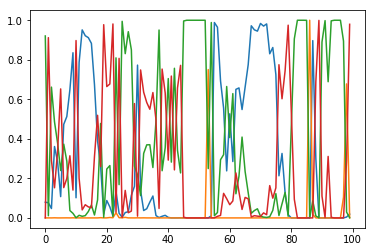

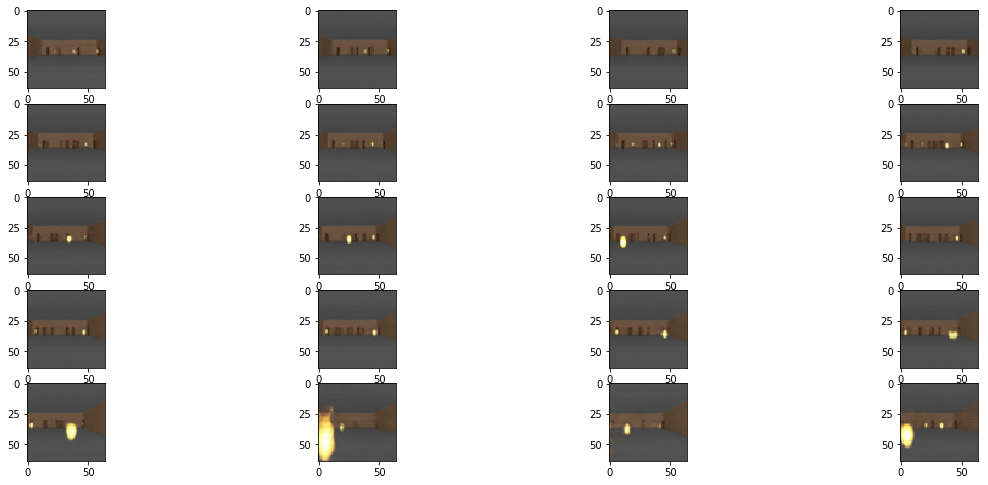

In [18]:
analyzer1= rnn_analyzers[4][7]
weights, zs = calc_mixture_weights_and_events_dreaming(analyzer1)
print("zs are ", zs)
visualize_mixture_weights_and_events(weights, zs, analyzer1)

In [19]:
import count_monsters_and_balls
import numpy as np
import collections
FIREBALL_THRESHOLD = 0.5
WALL_THRESHOLD = 0.39

def count_appearances_of_most_common_element_in_array(array):
    array=np.array(array)
    c = collections.Counter(array)
    m_c = c.most_common()
    print(m_c)
    if len(m_c)==0:
        return 0
    return m_c[0][1]

def name_most_common_element_in_array(array):
    array=np.array(array)
    c = collections.Counter(array)
    m_c = c.most_common()
    print(m_c)
    if len(m_c)==0:
        return 0
    return m_c[0][0]

#This measures how often the same event is captured by the same mixture.
#However, that is not enough: We also need to make sure the handling of the event is
#unique to that mixture. That is, we have to measure if that mixture also handles other events.
def measure_dominating_mixture_for_events(analyzer, num_steps = 100):
    # Measuring the tendency for different events to be modelled by different gaussians
    weights, zs = calc_mixture_weights_and_events_dreaming(analyzer,num_steps)
    dominating_mixture_during_explosions = []
    dominating_mixture_during_fireball = []
    dominating_mixture_during_wall_left = []
    dominating_mixture_during_wall_right = []
    dominating_mixture_otherwise = []

    decoded_images = analyzer.decode_with_vae(zs)
    visualize_mixture_weights_and_events(weights, zs, analyzer)
    for img_counter in range(len(decoded_images)):
        img = decoded_images[img_counter]
        weight_vector = weights[img_counter]
        dominating_mixture = np.argmax(weight_vector)
        is_exploding = count_monsters_and_balls.is_there_a_big_explosion(img, FIREBALL_THRESHOLD)
        is_fireball, _ = count_monsters_and_balls.count_fireballs(img, FIREBALL_THRESHOLD)
        is_left_wall = count_monsters_and_balls.is_there_a_lefthand_wall(img, WALL_THRESHOLD)
        is_right_wall = count_monsters_and_balls.is_there_a_righthand_wall(img, WALL_THRESHOLD)

        no_events_seen = True
        if is_exploding:
            dominating_mixture_during_explosions.append(dominating_mixture)
            no_events_seen = False
        elif is_fireball:
            dominating_mixture_during_fireball.append(dominating_mixture)
            no_events_seen = False
        elif is_left_wall:
            dominating_mixture_during_wall_left.append(dominating_mixture)
            no_events_seen = False
        elif is_right_wall:
            dominating_mixture_during_wall_right.append(dominating_mixture)
            no_events_seen = False

        if no_events_seen:
            dominating_mixture_otherwise.append(dominating_mixture) #TODO Add walls

    results = {"explosion_main" : count_appearances_of_most_common_element_in_array(dominating_mixture_during_explosions),
               "explosion_other" : len(dominating_mixture_during_explosions) - count_appearances_of_most_common_element_in_array(dominating_mixture_during_explosions),
               "fireball_main" : count_appearances_of_most_common_element_in_array(dominating_mixture_during_fireball),
               "fireball_other" : len(dominating_mixture_during_fireball) - count_appearances_of_most_common_element_in_array(dominating_mixture_during_fireball),
               "left_wall_main" : count_appearances_of_most_common_element_in_array(dominating_mixture_during_wall_left),
               "left_wall_other" : len(dominating_mixture_during_wall_left) - count_appearances_of_most_common_element_in_array(dominating_mixture_during_wall_left),
               "right_wall_main" : count_appearances_of_most_common_element_in_array(dominating_mixture_during_wall_right),
               "right_wall_other" : len(dominating_mixture_during_wall_right) - count_appearances_of_most_common_element_in_array(dominating_mixture_during_wall_right),
               "otherwise_main" : count_appearances_of_most_common_element_in_array(dominating_mixture_otherwise),
               "otherwise_other" : len(dominating_mixture_otherwise) - count_appearances_of_most_common_element_in_array(dominating_mixture_otherwise)}
    
    all_events_for_each_mixture = {}
    all_events = [dominating_mixture_during_explosions, dominating_mixture_during_fireball,
                 dominating_mixture_during_wall_left, dominating_mixture_during_wall_right,
                 dominating_mixture_otherwise]
    
    event_counter = 0
    for event in all_events:
        for mixture in event:
            if mixture in all_events_for_each_mixture.keys():
                all_events_for_each_mixture[mixture].append(event_counter)
            else:
                all_events_for_each_mixture[mixture] = [event_counter]
        event_counter +=1
        
    main_mixture_for_explosions = name_most_common_element_in_array(dominating_mixture_during_explosions)
    main_mixture_for_fireball = name_most_common_element_in_array(dominating_mixture_during_fireball)
    main_mixture_for_left_wall = name_most_common_element_in_array(dominating_mixture_during_wall_left)
    main_mixture_for_right_wall = name_most_common_element_in_array(dominating_mixture_during_wall_right)
    main_mixture_otherwise = name_most_common_element_in_array(dominating_mixture_otherwise)
    main_mixtures_for_events = {"explosion" : main_mixture_for_explosions,
                               "fireball" : main_mixture_for_fireball,
                               "left_wall" : main_mixture_for_left_wall,
                               "right_wall" : main_mixture_for_right_wall,
                               "otherwise" : main_mixture_otherwise}
    
    
    return results, all_events_for_each_mixture, main_mixtures_for_events
               

Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
[(2, 28), (0, 5), (1, 3), (3, 1)]
[(2, 28), (0, 5), (1, 3), (3, 1)]
[(3, 17), (2, 10), (1, 4), (0, 3)]
[(3, 17), (2, 10), (1, 4), (0, 3)]
[(3, 3), (0, 2), (1, 1)]
[(3, 3), (0, 2), (1, 1)]
[]
[]
[(0, 17), (3, 6)]
[(0, 17), (3, 6)]
[(2, 28), (0, 5), (1, 3), (3, 1)]
[(3, 17), (2, 10), (1, 4), (0, 3)]
[(3, 3), (0, 2), (1, 1)]
[]
[(0, 17), (3, 6)]
{2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 0: [0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 3: [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 4, 4, 4, 4, 4, 4], 1: [0, 0, 0, 1, 1, 1, 1, 2]}
{'explosion_main': 28, 'explosion_other': 9, 'fireball_main': 17, 'fireball_other': 17, 'left_wall_main': 3, 'left_wall_other': 3, 'right_wall_main': 0, 'right_wall_other': 0, 'otherwise_main': 17, 'otherwise_other': 6}
{'explosion': 2, 'fireball': 3, 'left_wall': 

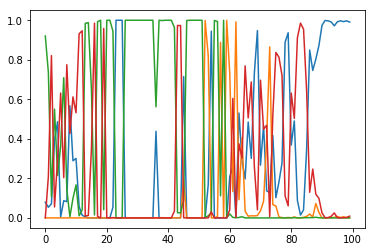

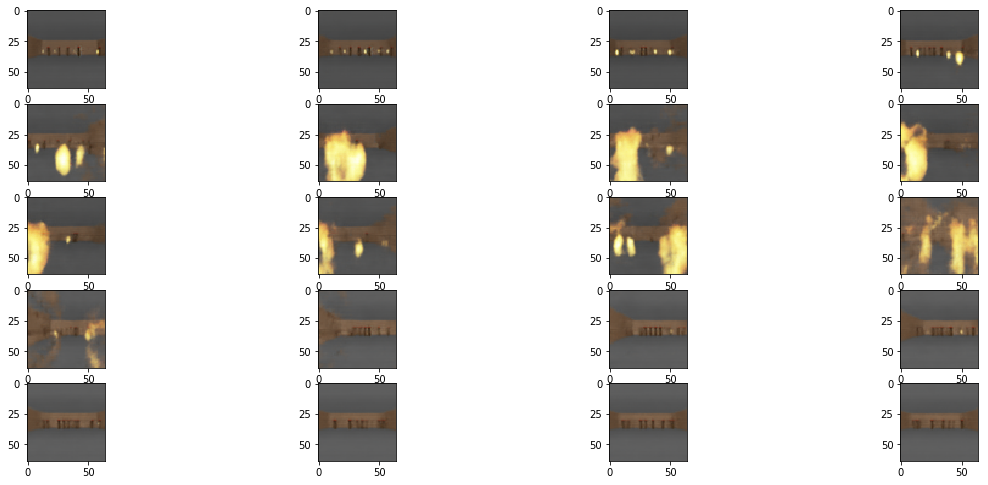

In [20]:
event_to_mixture, mixture_to_event, main_mixture = measure_dominating_mixture_for_events(analyzer1, 100)
print(mixture_to_event)
print(event_to_mixture)
print(main_mixture)



In [21]:
explosion_event = 0
explosions_captured_by_main_gaussian = 0
explosions_captured_by_other_gaussian = 0
main_mixture_id = -1
max_num_explosion_events = 0
total_num_explosion_events = 0
for mixture_id, event_array in mixture_to_event.items():
    num_explosions = np.count_nonzero(np.array(event_id), explosion_event)
    total_num_explosion_events += num_explosions
    if num_explosions > max_num_explosion_events:
        max_num_explosion_events = num_explosions
        main_mixture_id = mixture_id

NameError: name 'event_id' is not defined

In [ ]:
import pandas as pd
event_to_mixture_summary = []
main_mixture_summary = []
summary_num_events_handled_by_each_mixture = []
STATISTICAL_REPETITIONS = 5
SEQUENCE_LENGTH = 1000
for rep in range(STATISTICAL_REPETITIONS):
    for num_mixtures, rnn_model_list in rnn_analyzers.items():
        print(num_mixtures)
        if num_mixtures!=4:
            continue #Sticking to 4 now.
        for model in rnn_model_list:
            event_to_mixture, mixture_to_event, main_mixture = measure_dominating_mixture_for_events(model, 1000)
            event_to_mixture_summary.append(event_to_mixture)
            main_mixture_summary.append(main_mixture)
            num_events_handled_by_each_mixture={}
            for mixture, events in mixture_to_event.items():
                num_events_handled_by_each_mixture[mixture] = len(events)
            summary_num_events_handled_by_each_mixture.append(num_events_handled_by_each_mixture)
    
events_dataframe = pd.DataFrame(event_to_mixture_summary)
mixture_summary_dataframe = pd.DataFrame(main_mixture_summary)
summary_num_events_dataframe = pd.DataFrame(summary_num_events_handled_by_each_mixture)

1
2
8
4
Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(0, 50), (3, 32), (1, 13)]
[(0, 50), (3, 32), (1, 13)]
[(0, 390), (1, 42), (3, 28), (2, 25)]
[(0, 390), (1, 42), (3, 28), (2, 25)]
[(0, 29), (3, 5), (2, 2)]
[(0, 29), (3, 5), (2, 2)]
[(0, 61), (2, 4), (3, 3)]
[(0, 61), (2, 4), (3, 3)]
[(0, 270), (

In [23]:
print(events_dataframe)
print(main_mixture_summary)
print(summary_num_events_dataframe)

    explosion_main  explosion_other  fireball_main  fireball_other  \
0               14                6             45              35   
1               20                1             24              49   
2               22                0             27              49   
3               52                0             19              17   
4                0                0             22              48   
5               30                3             27              30   
6               44                6             18              32   
7               17               16             30              28   
8                8                1             22              31   
9                0                0             48              52   
10              30                3             39              28   
11               0                0             26              13   
12               7                9             36              32   
13              10  

In [ ]:
def count_events_in_main_vs_other_mixtures(events_dataframe, event_name, main_mixture_summary, summary_num_events_dataframe):
    #Helps analyze if one mixture typically takes responsability
    #for analyzing one specific event.
    
    #Counting how often the event is present in the most common mixture,
    #vs all the others.
    event_in_main_mixture = events_dataframe[event_name+"_main"]
    event_in_other_mixtures = events_dataframe[event_name+"_other"]
    id_of_main_mixture = [d[event_name] for d in main_mixture_summary]
    
    total_num_main_mixture = []
    total_num_all_mixtures = []
    summary_num_events_dataframe=summary_num_events_dataframe.fillna(0)
    for index, row in summary_num_events_dataframe.iterrows():
        total_num_main_mixture.append(row[id_of_main_mixture[index]])
        total_num_all_mixtures.append(sum(row))

    total_non_main_mixture = np.subtract(np.array(total_num_all_mixtures), total_num_main_mixture)
    main_mixture_dict = {event_name: event_in_main_mixture,
                  "total" : total_num_main_mixture,
                        "main_mixture": "Yes"}
    non_main_mixture_dict = {event_name: event_in_other_mixtures,
                  "total": total_non_main_mixture,
                                "main_mixture":"No"}
    return_frame = pd.DataFrame(main_mixture_dict)
    return_frame_b = pd.DataFrame(non_main_mixture_dict)
    return_frame= return_frame.append(return_frame_b)
    return return_frame

## Explosions

In [ ]:
explosions_data = count_events_in_main_vs_other_mixtures(events_dataframe, "explosion", main_mixture_summary, summary_num_events_dataframe)
print(explosions_data)
pd.melt(explosions_data, id_vars=['main_mixture'])

In [ ]:
import seaborn as sns
sns.boxplot(x="variable", y="value", hue="main_mixture", data=pd.melt(explosions_data, id_vars=['main_mixture']))

## Left Walls

In [ ]:
left_walls_data = count_events_in_main_vs_other_mixtures(events_dataframe, "left_wall", main_mixture_summary, summary_num_events_dataframe)
print(left_walls_data)
pd.melt(left_walls_data, id_vars=['main_mixture'])

In [ ]:
sns.boxplot(x="variable", y="value", hue="main_mixture", data=pd.melt(left_walls_data, id_vars=['main_mixture']))

## Right Walls

In [ ]:
right_walls_data = count_events_in_main_vs_other_mixtures(events_dataframe, "right_wall", main_mixture_summary, summary_num_events_dataframe)
pd.melt(right_walls_data, id_vars=['main_mixture'])
sns.boxplot(x="variable", y="value", hue="main_mixture", data=pd.melt(right_walls_data, id_vars=['main_mixture']))

## Fireballs

In [ ]:
fireball_data = count_events_in_main_vs_other_mixtures(events_dataframe, "fireball", main_mixture_summary, summary_num_events_dataframe)
pd.melt(right_walls_data, id_vars=['main_mixture'])
sns.boxplot(x="variable", y="value", hue="main_mixture", data=pd.melt(fireball_data, id_vars=['main_mixture']))